In [1]:
import numpy as np
from RadarDevKit import RadarModule
from RadarDevKit.ConfigClasses import SysParams
from collect_data import get_range_bins
from config import RunParams, get_radar_module, get_radar_params, get_run_params

n_samples = 1024         # always 1024 samples per channel
radar_module = get_radar_module()
run_params= get_run_params()
num_time_steps = 100

range_axis = get_range_bins(radar_module)
time_axis = np.linspace(0, radar_module.sysParams.t_ramp, n_samples)

Connect
GetHwParams
Number of the connected Radar Module:  2130000071
GetSysParams
SetSysParams
GetSysParams
Frequency [MHz]:  24000
Bandwidth [MHz]:  600
Ramp-time [ms]:  7
Number Points:  512
Bin Size (Resolution) [m]:  0.249887

Connected to the radar.


In [2]:
from get_all_sensor_data import get_td_data_voltage
import datetime



td_data = []
sampling_times = []
total_times = []
run_time = datetime.datetime.now()


for i in range(num_time_steps):
    start_time = datetime.datetime.now()
    values = get_td_data_voltage(run_params=run_params, radar_module=radar_module)
    td_data.append(values)
    duration = datetime.datetime.now() - start_time
    sampling_times.append(duration.total_seconds())
    total_times.append((datetime.datetime.now() - run_time).total_seconds())

# Calculate the average sampling time
AVERAGE_SAMPLING_TIME  = sum(sampling_times) / len(sampling_times) if sampling_times else 0
print(AVERAGE_SAMPLING_TIME)

(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)
(4, 1024)


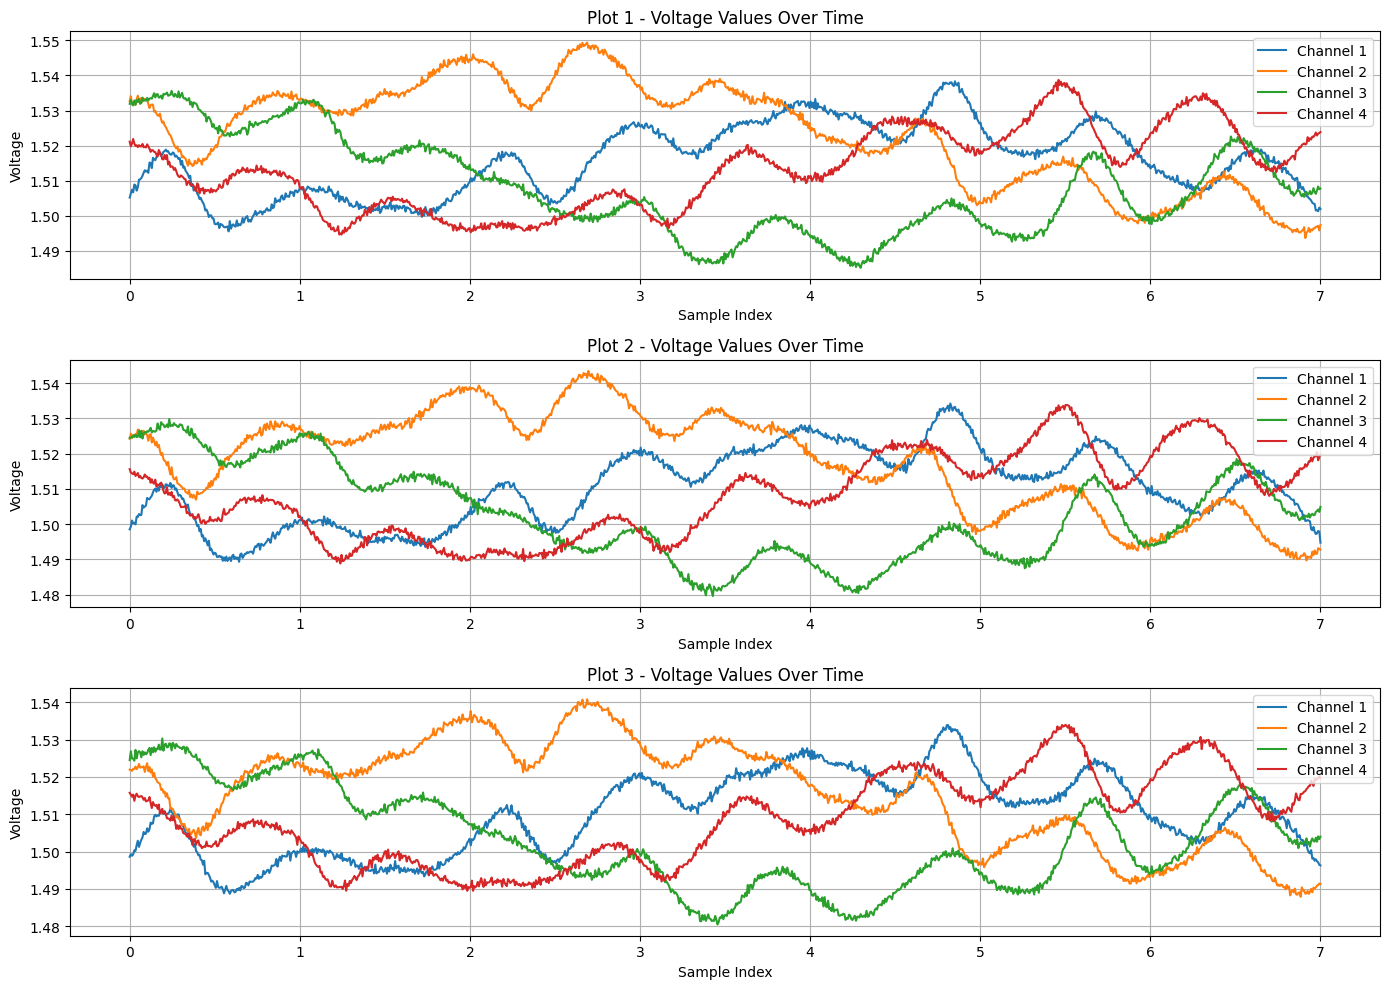

In [3]:
import matplotlib.pyplot as plt

# Assuming `test` is already populated with your data
# Create a single figure for all subplots
plt.figure(figsize=(14, 10))  # Adjust the figure size to accommodate all subplots

# Iterate over the first three arrays
for i, data in enumerate(td_data[0:3]):
    ax = plt.subplot(3, 1, i + 1)  # Create a subplot for each array
    for ch in range(4):
        ax.plot(time_axis, data[ch], label=f'Channel {ch+1}')  # Plot each channel's data on the current subplot
    
    ax.set_title(f'Plot {i+1} - Voltage Values Over Time')
    ax.set_xlabel('Sample Index')
    ax.set_ylabel('Voltage')
    ax.legend()
    ax.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

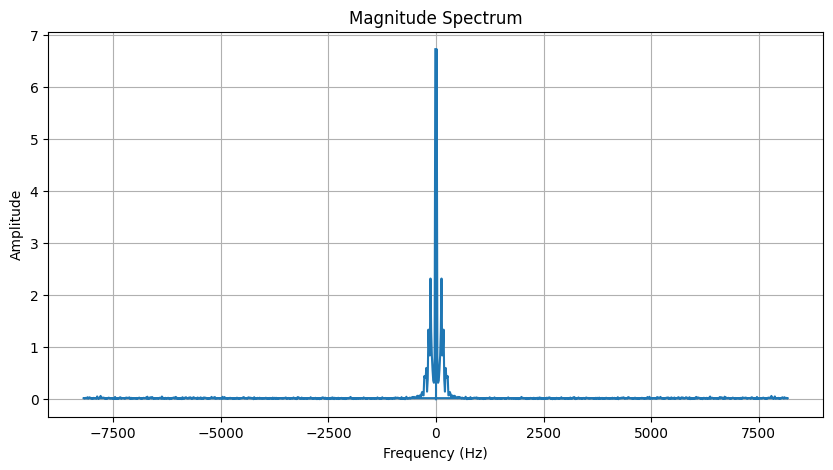

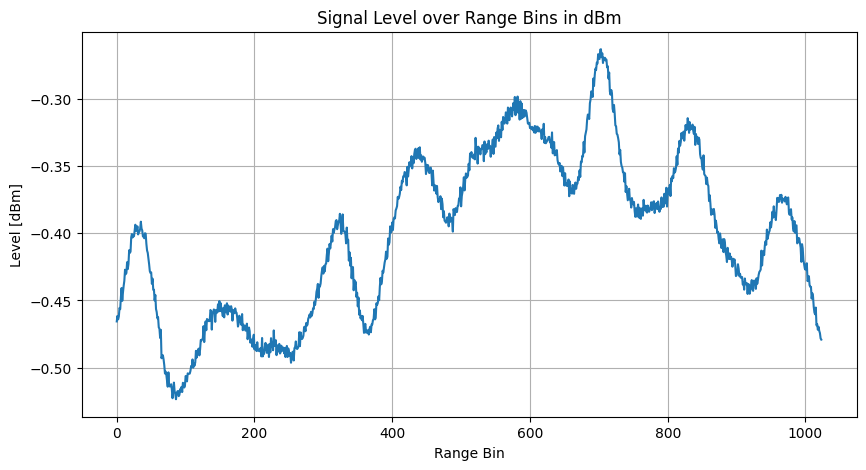

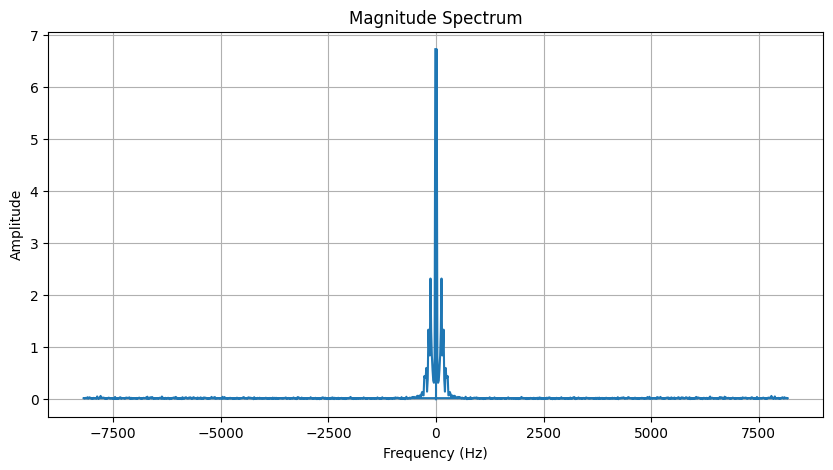

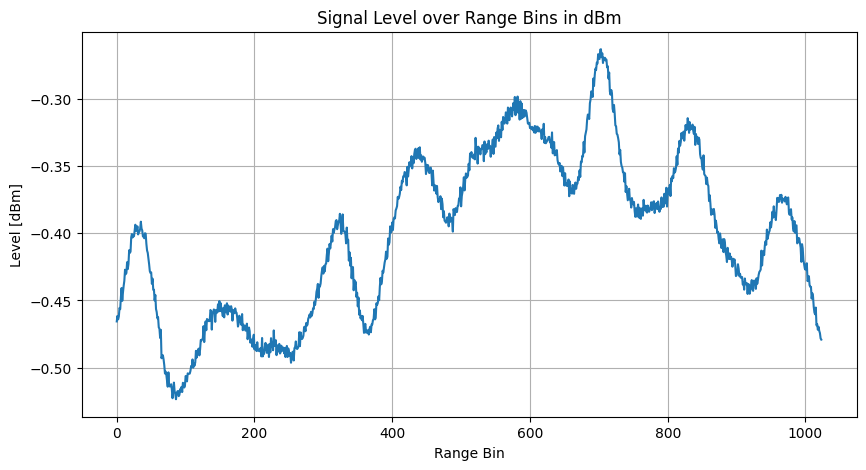

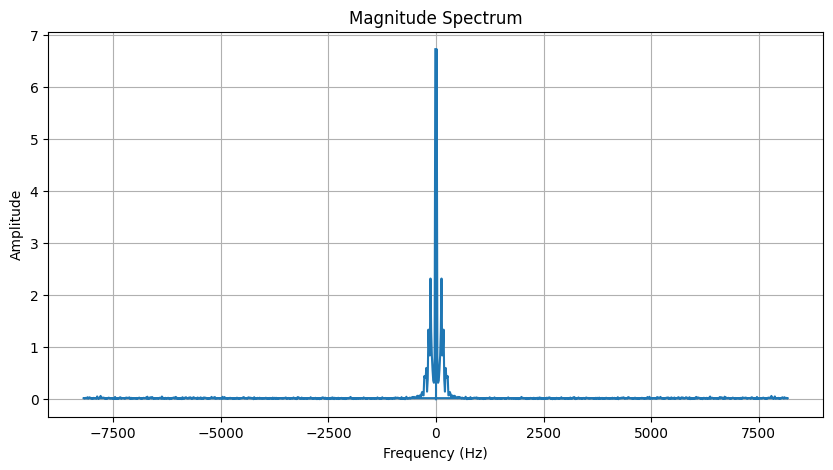

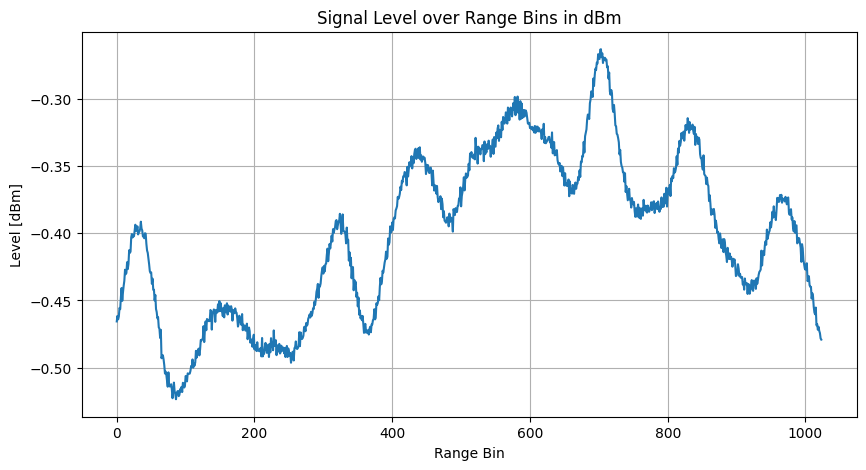

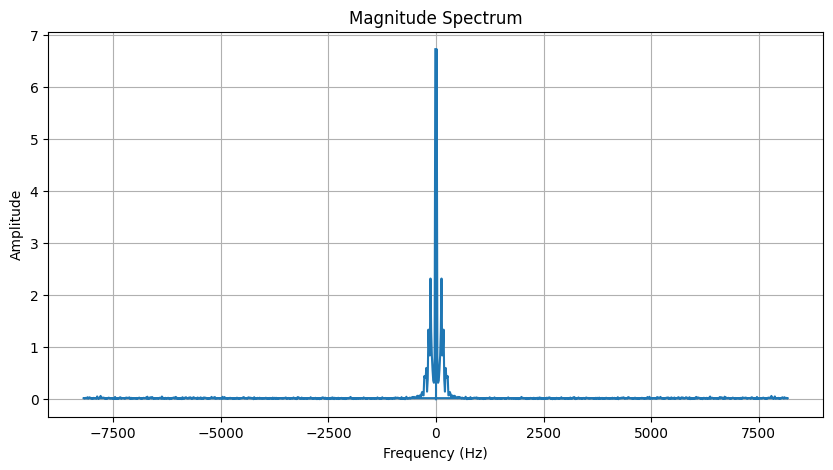

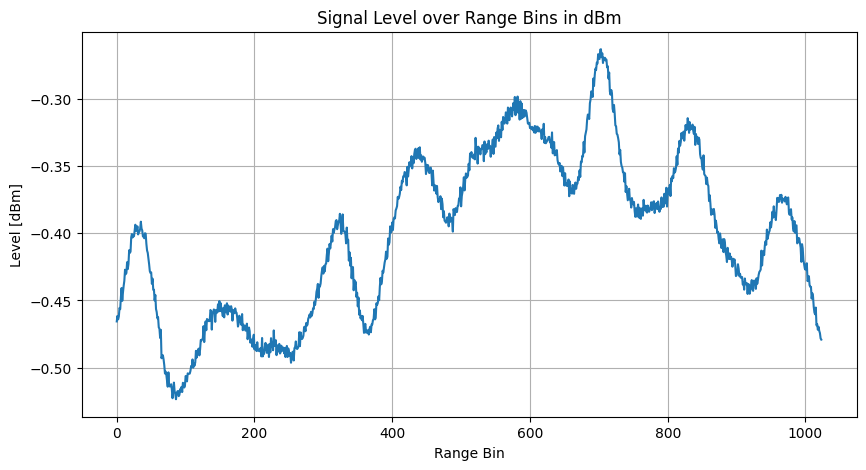

In [4]:
from scipy.signal import butter, filtfilt

Z0 = 50  # Characteristic impedance of the system in ohms
tx_attenuation_dB = 9  # Tx attenuation in dB
rf_output_power_dBm = 10  # Maximum RF output power in dBm

time = np.linspace(0, AVERAGE_SAMPLING_TIME, 1024, endpoint=False)  # AVERAGE_SAMPLING_TIME seconds duration, 1024 samples

for i, sweep in enumerate(td_data):
    if i > 3:
        continue
    I1 = data[0]
    Q1 = data[1]
    I2 = data[2]
    Q2 = data[3]
    
    fs = 73142.86  # Sample rate, Hz
    cutoff = 100  # Desired cutoff frequency of the high-pass filter, Hz
    # filtered_signal = highpass_filter(I1, cutoff, fs)
    
    mean_value = np.mean(I1)
    signal_centered = I1 - mean_value
    
    fft_result = np.fft.fft(signal_centered)
    frequencies = np.fft.fftfreq(len(signal_centered), time[1] - time[0])  # Frequency axis

    # Plotting the magnitude spectrum
    plt.figure(figsize=(10, 5))
    plt.plot(frequencies, np.abs(fft_result))
    plt.title('Magnitude Spectrum')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.show()
    
    # Example: Assuming `voltage` is an array of voltage values from your FFT in V RMS
    R = 50  # Resistance in ohms
    
    magnitude = np.abs(fft_result[:-512])
    
    # Calculate power in watts assuming the signal is across a load of Z0 ohms
    power = (magnitude ** 2) / R

    # Adjust power for Tx attenuation
    power_adjusted = power * 10**(-tx_attenuation_dB / 10)

    # Normalize power based on the radar's RF output power
    power_normalized = power_adjusted * (10**(rf_output_power_dBm / 10)) / np.sum(power_adjusted)

    # Convert power to dBm (decibel-milliwatts)
    power_dbm = 10 * np.log10(power_normalized / 0.001)

    # Calculate power in watts
    power_watts = (I1 / R) ** 2

    # Convert power to dBm
    power_dbm = 10 * np.log10(power_watts * 1000)

    plt.figure(figsize=(10, 5))
    plt.plot(power_dbm)
    plt.title('Signal Level over Range Bins in dBm')
    plt.xlabel('Range Bin')
    plt.ylabel('Level [dBm]')
    plt.grid(True)
    plt.show()

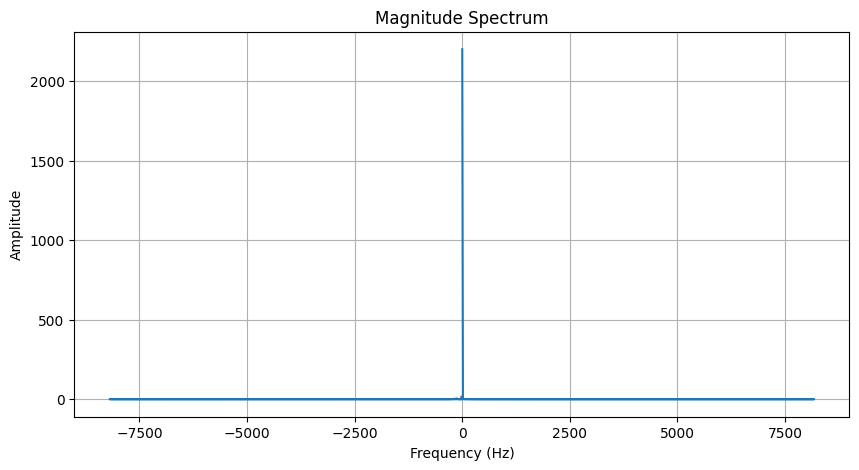

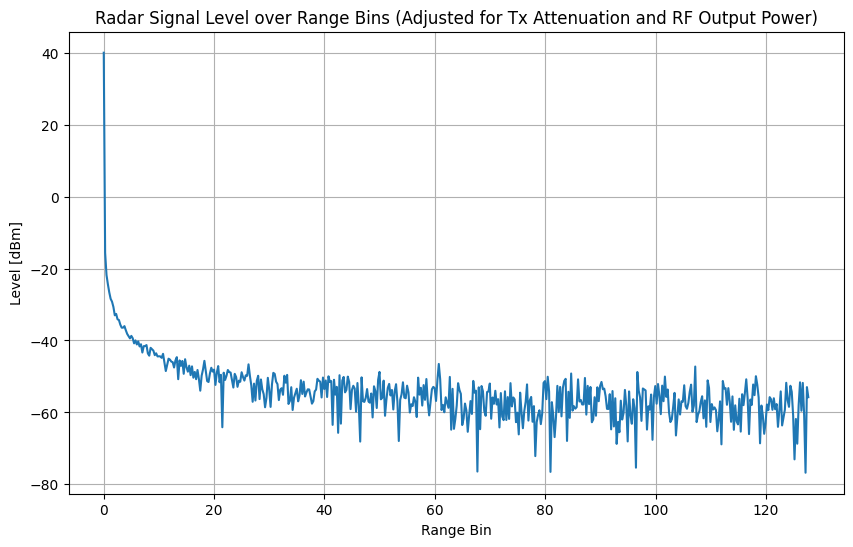

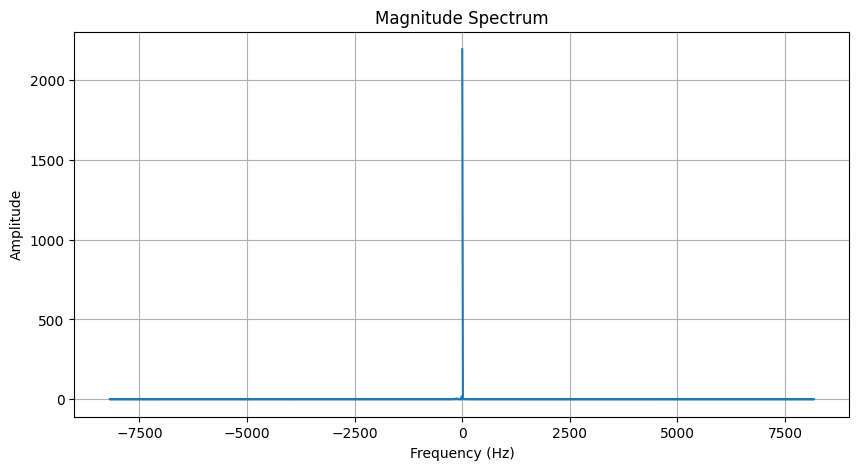

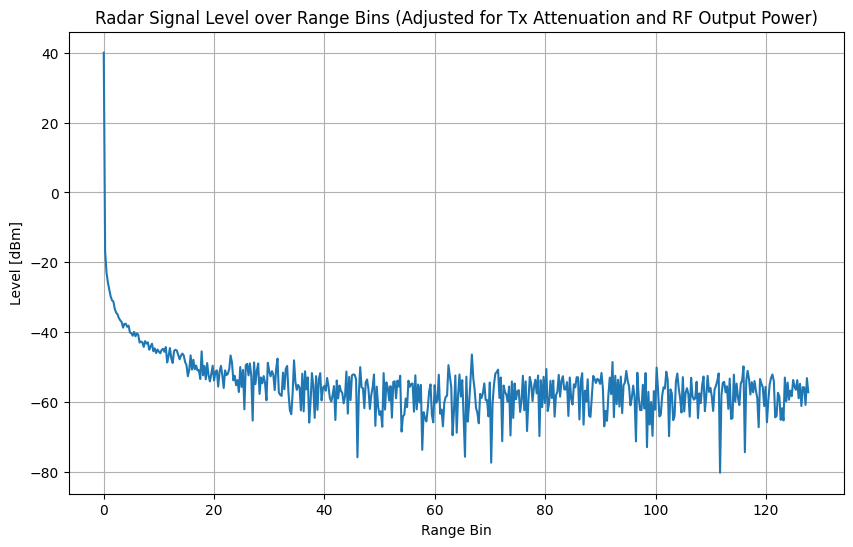

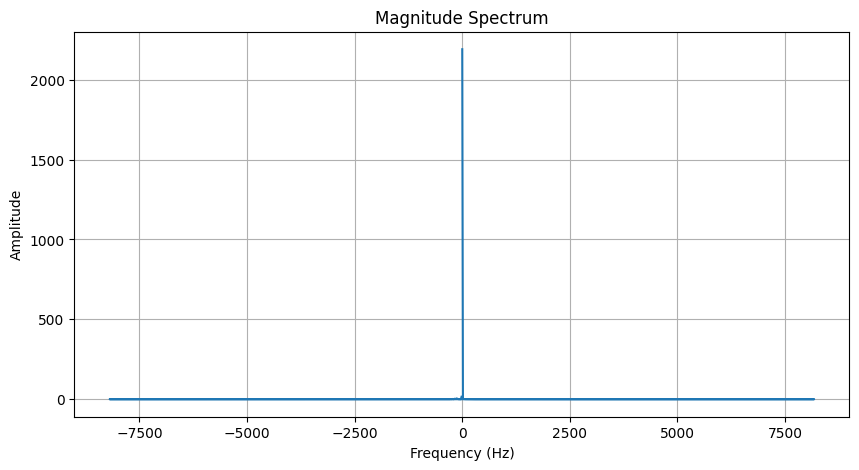

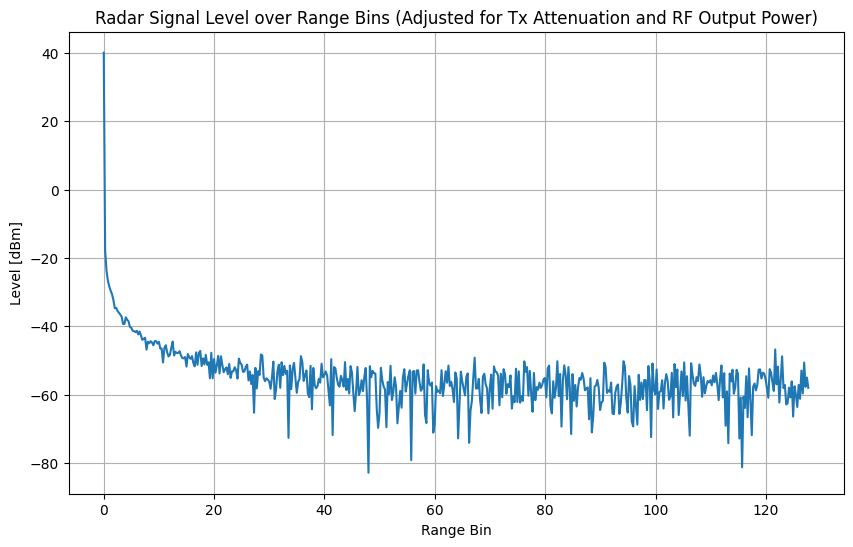

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
Z0 = 50  # Characteristic impedance of the system in ohms
tx_attenuation_dB = 9  # Tx attenuation in dB
rf_output_power_dBm = 10  # Maximum RF output power in dBm

# Process each radar sweep in td_data
for i, sweep in enumerate(td_data):
    if i > 2:
        continue
    # Reshape the data into a (4, 1024) array if it's not already
    data = np.reshape(sweep, (4, 1024))

    # Combine I and Q to form the complex radar signal
    # Assuming data[0] and data[1] are I1 and Q1 for the first channel, respectively
    complex_signal = data[0] + 1j * data[1]

    # Perform FFT on the full 1024 sample dataset
    fft_result = np.fft.fft(complex_signal, n=1024)

    # Take only the first half of the FFT result up to the Nyquist frequency
    # Including the Nyquist point, so 513 points in total
    fft_half = fft_result[:512]
    
    frequencies = np.fft.fftfreq(len(fft_result), time[1] - time[0])  # Frequency axis

    # Plotting the magnitude spectrum
    plt.figure(figsize=(10, 5))
    plt.plot(frequencies, np.abs(fft_result))
    plt.title('Magnitude Spectrum')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.show()

    # Compute the magnitude of the FFT results
    magnitude = np.abs(fft_half)

    # Calculate power in watts assuming the signal is across a load of Z0 ohms
    power = (magnitude ** 2) / Z0

    # Adjust power for Tx attenuation
    power_adjusted = power * 10**(-tx_attenuation_dB / 10)

    # Normalize power based on the radar's RF output power
    power_normalized = power_adjusted * (10**(rf_output_power_dBm / 10)) / np.sum(power_adjusted)

    # Convert power to dBm (decibel-milliwatts)
    power_dbm = 10 * np.log10(power_normalized / 0.001)

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(range_axis, power_dbm)
    plt.title('Radar Signal Level over Range Bins (Adjusted for Tx Attenuation and RF Output Power)')
    plt.xlabel('Range Bin')
    plt.ylabel('Level [dBm]')
    plt.grid(True)
    plt.show()

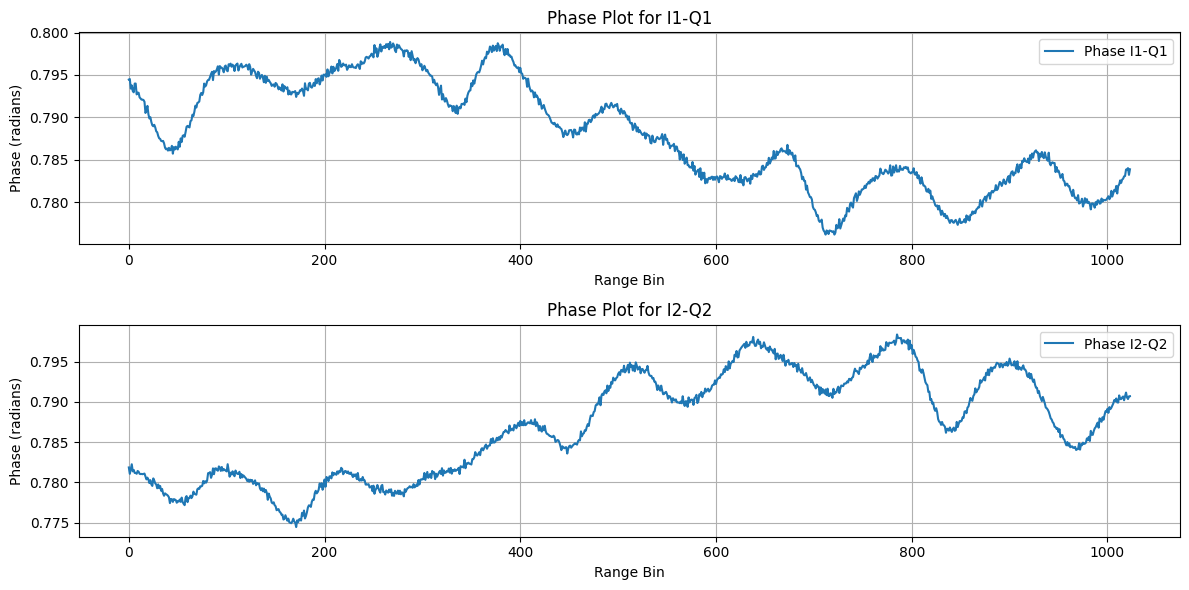

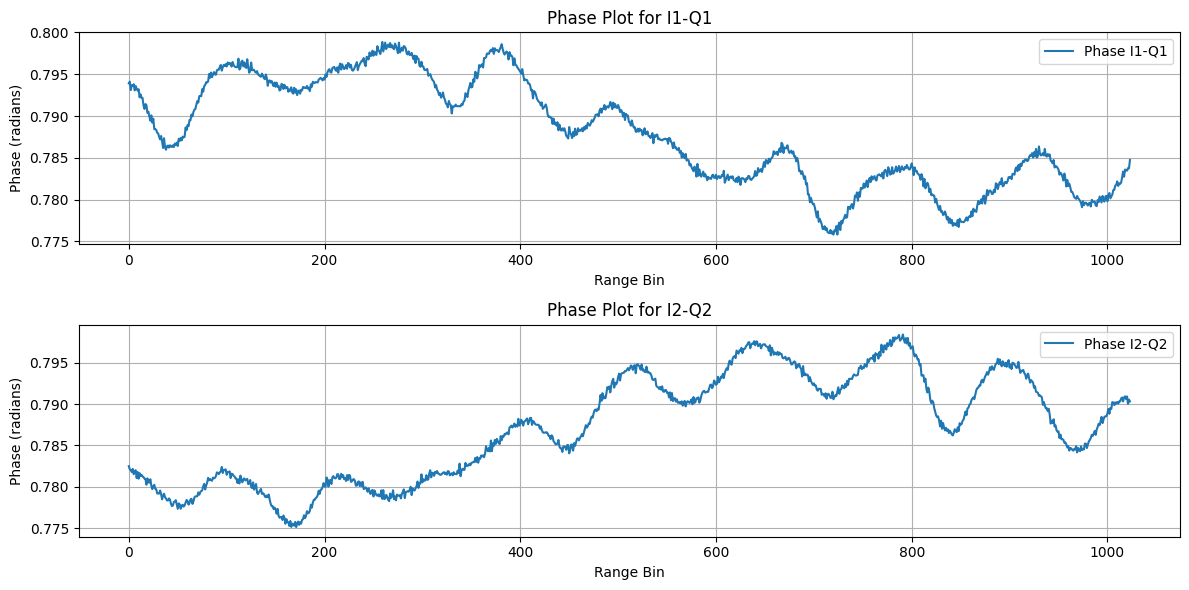

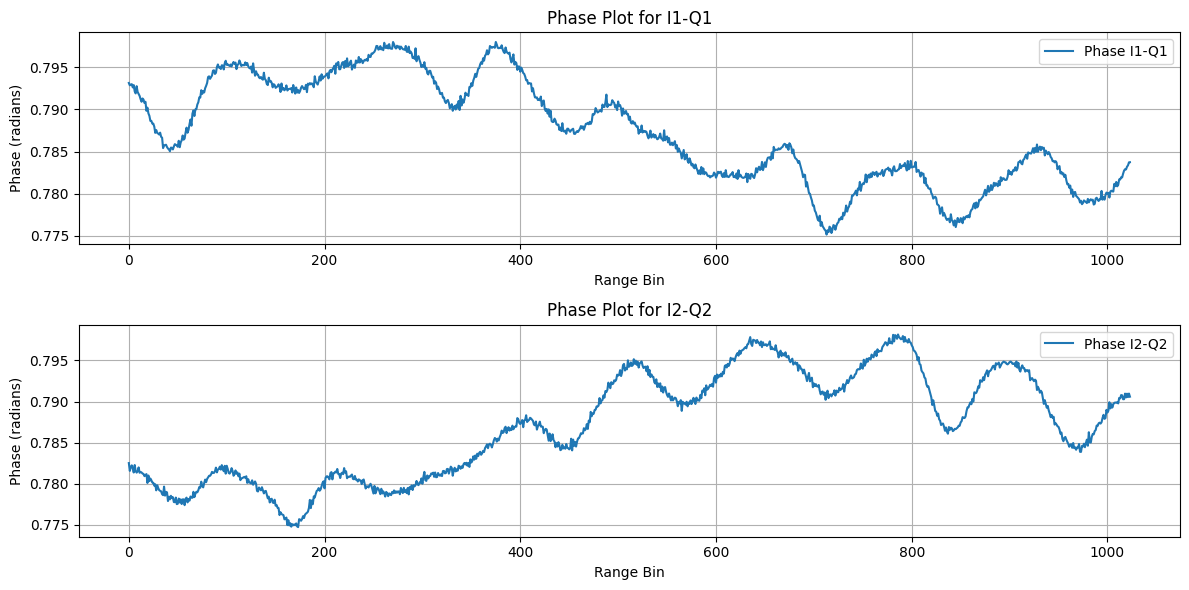

In [6]:
# Radial velocity
for i, data in enumerate(td_data):
    if i > 2:
        continue
    I1 = data[0]
    Q1 = data[1]
    I2 = data[2]
    Q2 = data[3]
    
    complex_signal_1 = I1 + 1j * Q1
    complex_signal_2 = I2 + 1j * Q2
    
    phase_1 = np.angle(complex_signal_1)
    phase_2 = np.angle(complex_signal_2)
    # Apply phase unwrapping
    phase_1_unwrapped = np.unwrap(phase_1)
    phase_2_unwrapped = np.unwrap(phase_2)
    
    phase_difference = phase_1_unwrapped - phase_2_unwrapped
    
    # Plotting the phase
    plt.figure(figsize=(12, 6))

    plt.subplot(2, 1, 1)
    plt.plot(phase_1, label='Phase I1-Q1')
    plt.xlabel('Range Bin')
    plt.ylabel('Phase (radians)')
    plt.title('Phase Plot for I1-Q1')
    plt.grid(True)
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.plot(phase_2, label='Phase I2-Q2')
    plt.xlabel('Range Bin')
    plt.ylabel('Phase (radians)')
    plt.title('Phase Plot for I2-Q2')
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()

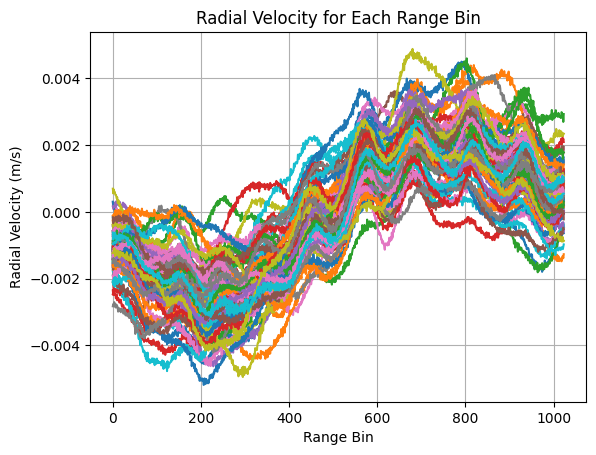

In [7]:
radial_velocity_list = []

# Radial velocity
for i, data in enumerate(td_data):

    I1 = data[0]
    Q1 = data[1]
    I2 = data[2]
    Q2 = data[3]
    
    complex_signal_1 = I1 + 1j * Q1
    complex_signal_2 = I2 + 1j * Q2
    
    phase_1 = np.angle(complex_signal_1)
    phase_2 = np.angle(complex_signal_2)
    phase_difference = phase_2 - phase_1
    
    # Ensure the phase difference is within -pi to pi
    phase_difference = np.arctan2(np.sin(phase_difference), np.cos(phase_difference))
    
    radial_velocity = (phase_difference * 0.0123457) / (4 * np.pi * 0.007)
    radial_velocity_list.append(radial_velocity)

    # Convert to numpy array for easier plotting
radial_velocity_array = np.array(radial_velocity_list)

# Plotting
for i in range(radial_velocity_array.shape[0]):
    plt.plot(radial_velocity_array[i], label=f'Time interval {i+1}')

plt.xlabel('Range Bin')
plt.ylabel('Radial Velocity (m/s)')
plt.title('Radial Velocity for Each Range Bin')
# plt.legend()
plt.grid(True)
plt.show()

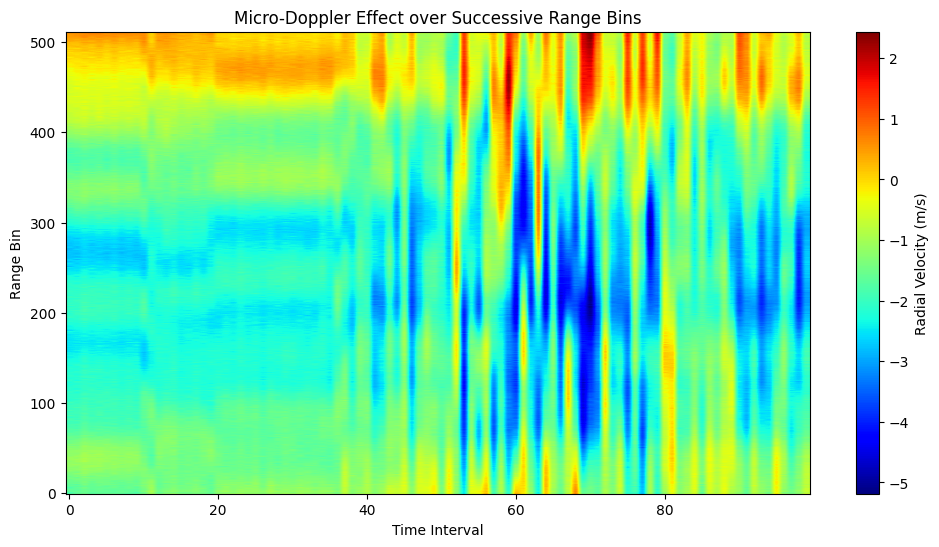

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming data_fd is your data array of shape (N, 4, 512)
# Sample data for demonstration (replace with your actual data)
# data_fd = np.random.randn(N, 4, 512)

# Constants
wavelength = 12.13734648  # in meters (for 24.3 GHz)
time_interval = 0.007*0.98304  # in seconds
max_bin = 512

# Initialize a list to hold radial velocity data
radial_velocity_list = []

for i, data in enumerate(td_data):
    I1 = data[0]
    Q1 = data[1]
    I2 = data[2]
    Q2 = data[3]
    
    complex_signal_1 = I1 + 1j * Q1
    complex_signal_2 = I2 + 1j * Q2
    
    phase_1 = np.angle(complex_signal_1)
    phase_2 = np.angle(complex_signal_2)
    phase_difference = phase_2 - phase_1
    
    # Ensure the phase difference is within -pi to pi
    phase_difference = np.arctan2(np.sin(phase_difference), np.cos(phase_difference))
    
    radial_velocity = (phase_difference * wavelength) / (4 * np.pi * time_interval)
    radial_velocity_list.append(radial_velocity[0:max_bin])

# Convert to numpy array for easier plotting
radial_velocity_array = np.array(radial_velocity_list)

# Plotting
plt.figure(figsize=(12, 6))
plt.imshow(radial_velocity_array.T, aspect='auto', cmap='jet', origin='lower')
plt.colorbar(label='Radial Velocity (m/s)')
plt.xlabel('Time Interval')
plt.ylabel('Range Bin')
plt.title('Micro-Doppler Effect over Successive Range Bins')
plt.show()

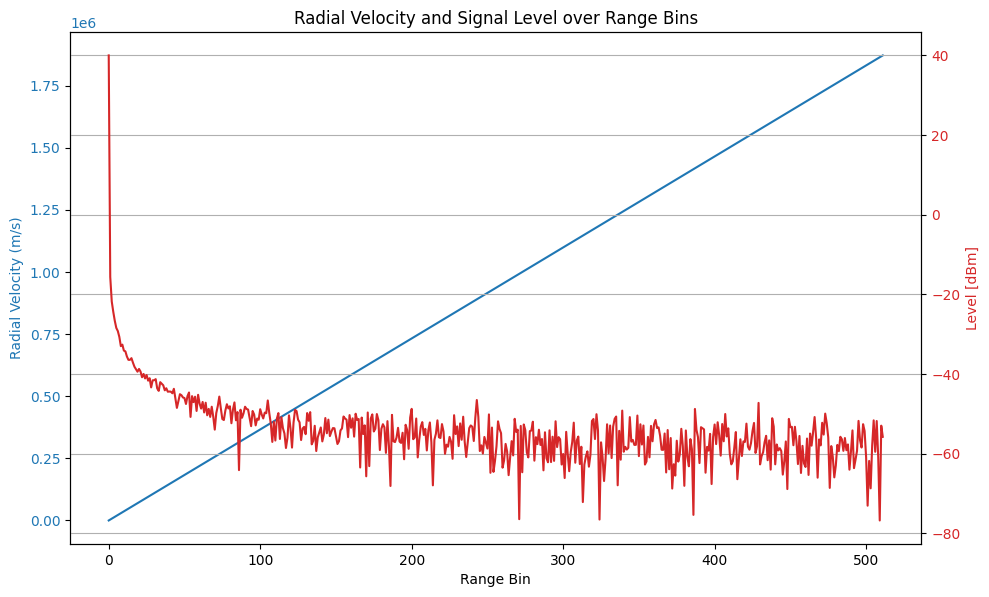

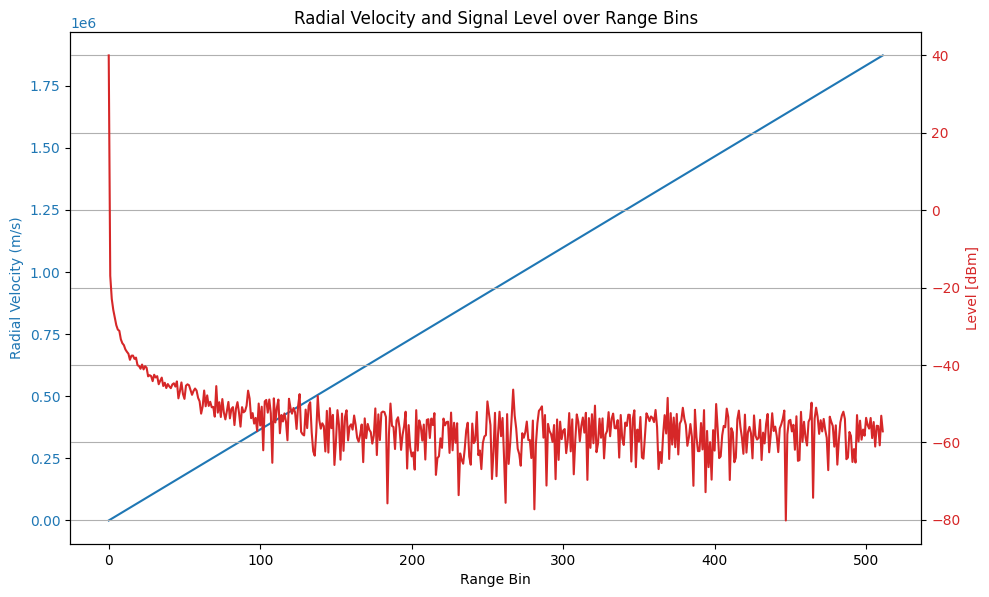

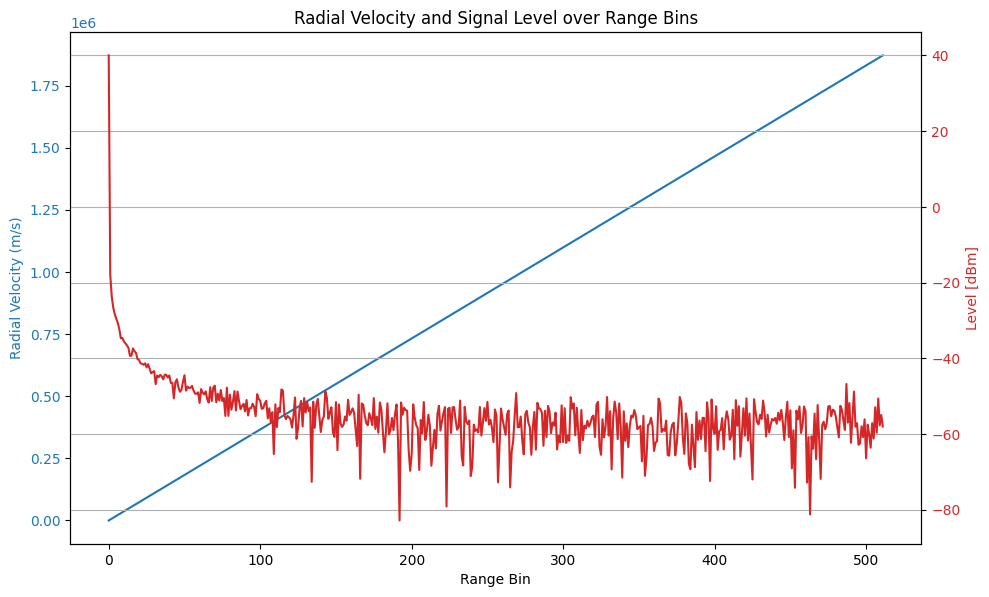

In [9]:
import numpy as np
import numpy as np
import matplotlib.pyplot as plt

# Constants
Z0 = 50  # Characteristic impedance of the system in ohms
tx_attenuation_dB = 9  # Tx attenuation in dB
rf_output_power_dBm = 10  # Maximum RF output power in dBm
c = 3e8  # Speed of light in m/s
fc = 24e9  # Carrier frequency in Hz (24 GHz)
B = 600e6  # Bandwidth in Hz (600 MHz)
N = 1024  # Number of FFT points

# Frequency resolution
delta_f = B / N

# Process each radar sweep in td_data
for sweep in td_data[0:3]:
    # Reshape the data into a (4, 1024) array if it's not already
    data = np.reshape(sweep, (4, 1024))

    # Combine I and Q to form the complex radar signal
    # Assuming data[0] and data[1] are I1 and Q1 for the first channel, respectively
    complex_signal = data[0] + 1j * data[1]

    # Perform FFT on the full 1024 sample dataset
    fft_result = np.fft.fft(complex_signal, n=1024)

    # Take only the first half of the FFT result up to the Nyquist frequency
    # Including the Nyquist point, so 513 points in total
    fft_half = fft_result[:512]

    # Compute the magnitude of the FFT results
    magnitude = np.abs(fft_half)

    # Calculate power in watts assuming the signal is across a load of Z0 ohms
    power = (magnitude ** 2) / Z0

    # Adjust power for Tx attenuation
    power_adjusted = power * 10**(-tx_attenuation_dB / 10)

    # Normalize power based on the radar's RF output power
    power_normalized = power_adjusted * (10**(rf_output_power_dBm / 10)) / np.sum(power_adjusted)

    # Convert power to dBm (decibel-milliwatts)
    power_dbm = 10 * np.log10(power_normalized / 0.001)

    # Calculate Doppler shift for each bin and convert to radial velocity
    # The frequency bins should be centered around 0 Hz for accurate Doppler calculations
    doppler_shift = np.fft.fftfreq(N, d=1/B)[:512]
    radial_velocity = (doppler_shift * c) / (2 * fc)

    # Plotting Radial Velocity vs Range Bin
    # plt.figure(figsize=(10, 6))
    # plt.plot(np.arange(512), radial_velocity)
    # plt.title('Radial Velocity vs Range Bin')
    # plt.xlabel('Range Bin')
    # plt.ylabel('Radial Velocity (m/s)')
    # plt.grid(True)
    # plt.show()

    # Optional: If you want to overlay power levels in dBm
    fig, ax1 = plt.subplots(figsize=(10, 6))

    color = 'tab:blue'
    ax1.set_xlabel('Range Bin')
    ax1.set_ylabel('Radial Velocity (m/s)', color=color)
    ax1.plot(np.arange(512), radial_velocity, color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    color = 'tab:red'
    ax2.set_ylabel('Level [dBm]', color=color)  # we already handled the x-label with ax1
    ax2.plot(np.arange(512), power_dbm, color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.title('Radial Velocity and Signal Level over Range Bins')
    plt.grid(True)
    plt.show()


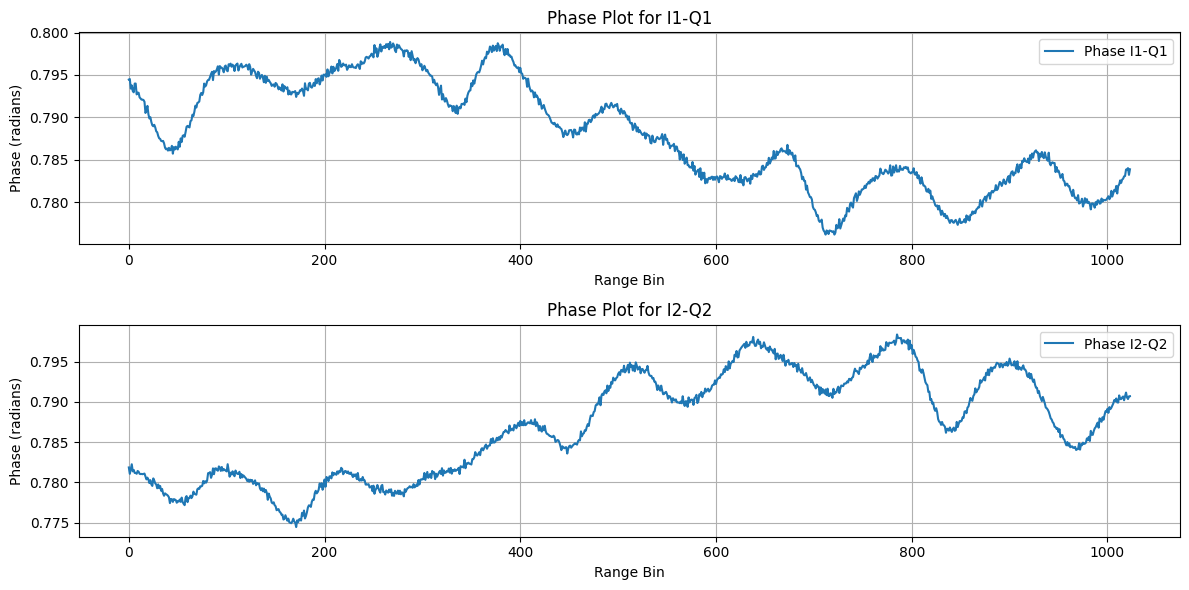

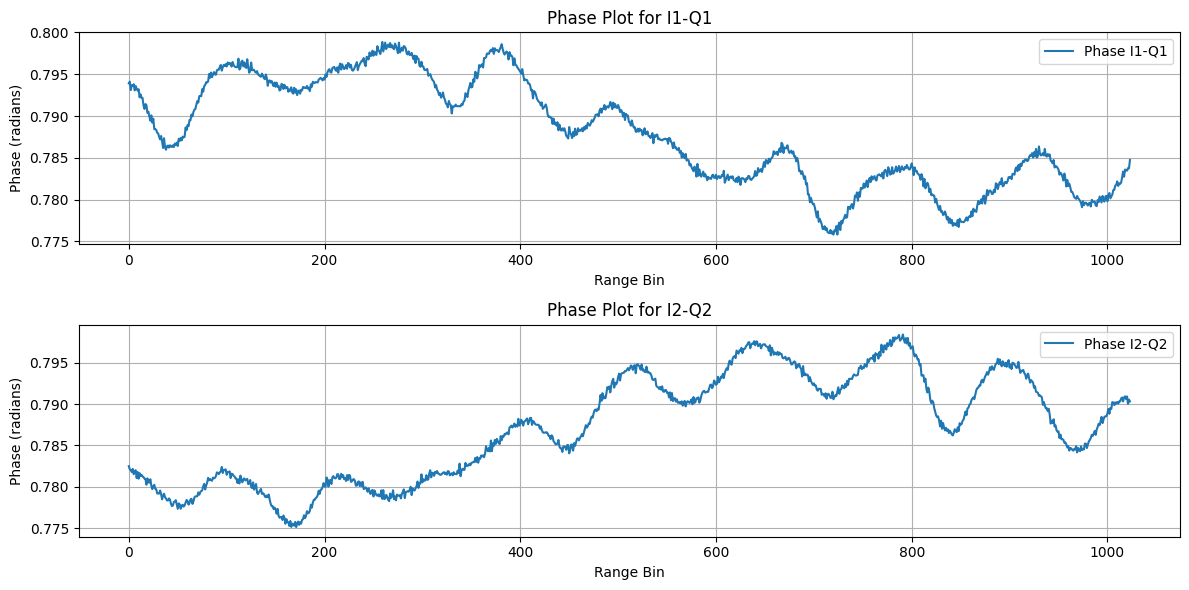

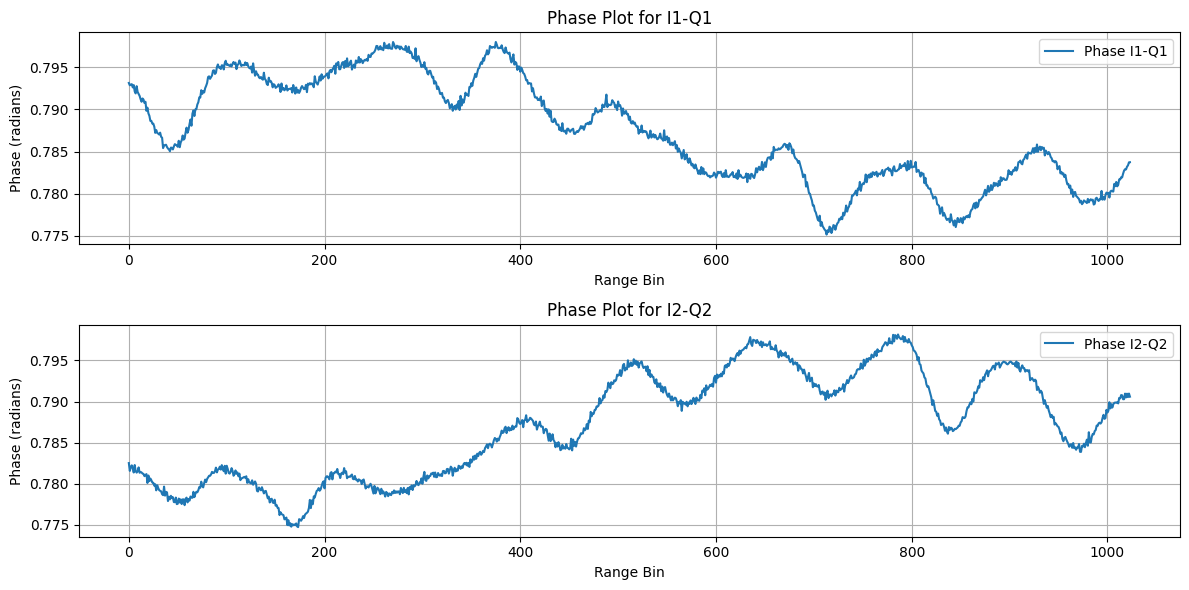

In [10]:
for i, data in enumerate(td_data):
    if i > 2:
        continue
    I1 = data[0]
    Q1 = data[1]
    I2 = data[2]
    Q2 = data[3]
    
    complex_signal_1 = I1 + 1j * Q1
    complex_signal_2 = I2 + 1j * Q2
    
    phase_1 = np.angle(complex_signal_1)
    phase_2 = np.angle(complex_signal_2)
    # Apply phase unwrapping
    phase_1_unwrapped = np.unwrap(phase_1)
    phase_2_unwrapped = np.unwrap(phase_2)
    
    phase_difference = phase_1_unwrapped - phase_2_unwrapped
    
    
    # Plotting the phase
    plt.figure(figsize=(12, 6))

    plt.subplot(2, 1, 1)
    plt.plot(phase_1, label='Phase I1-Q1')
    plt.xlabel('Range Bin')
    plt.ylabel('Phase (radians)')
    plt.title('Phase Plot for I1-Q1')
    plt.grid(True)
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.plot(phase_2, label='Phase I2-Q2')
    plt.xlabel('Range Bin')
    plt.ylabel('Phase (radians)')
    plt.title('Phase Plot for I2-Q2')
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()

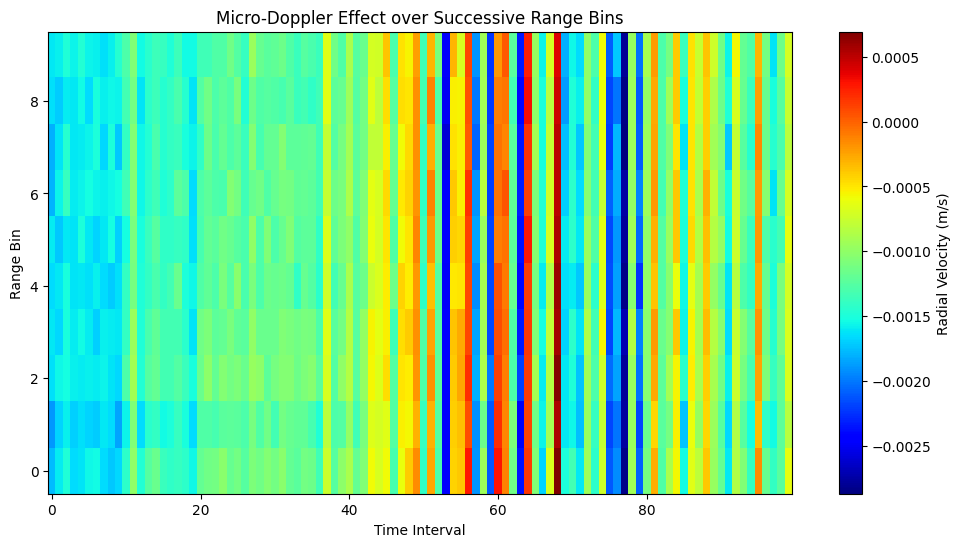

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming data_fd is your data array of shape (N, 4, 512)
# Sample data for demonstration (replace with your actual data)
# data_fd = np.random.randn(N, 4, 512)

# Constants
wavelength = 0.0123457  # in meters (for 24.3 GHz)
time_interval = 0.007  # in seconds

# Initialize a list to hold radial velocity data
radial_velocity_list = []

for i, data in enumerate(td_data):
    I1 = data[0]
    Q1 = data[1]
    I2 = data[2]
    Q2 = data[3]
    
    complex_signal_1 = I1 + 1j * Q1
    complex_signal_2 = I2 + 1j * Q2
    
    phase_1 = np.angle(complex_signal_1)
    phase_2 = np.angle(complex_signal_2)
    phase_1_unwrapped = np.unwrap(phase_1)
    phase_2_unwrapped = np.unwrap(phase_2)
    phase_difference = phase_2_unwrapped - phase_1_unwrapped
    
    # Ensure the phase difference is within -pi to pi
    phase_difference = np.arctan2(np.sin(phase_difference), np.cos(phase_difference))
    
    radial_velocity = (phase_difference * wavelength) / (4 * np.pi * time_interval)
    radial_velocity_list.append(radial_velocity[0:10])

# Convert to numpy array for easier plotting
radial_velocity_array = np.array(radial_velocity_list)

# Plotting
plt.figure(figsize=(12, 6))
plt.imshow(radial_velocity_array.T, aspect='auto', cmap='jet', origin='lower')
plt.colorbar(label='Radial Velocity (m/s)')
plt.xlabel('Time Interval')
plt.ylabel('Range Bin')
plt.title('Micro-Doppler Effect over Successive Range Bins')
plt.show()

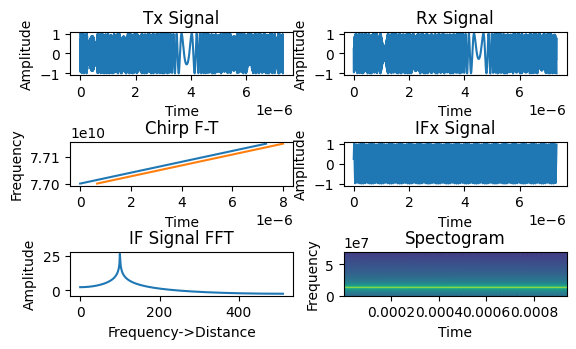

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import fft

#Radar parameters setting
maxR = 200 
rangeRes = 1
maxV = 70 
fc = 77e9
c = 3e8 

r0 = 100 
v0 = 70

B = c/(2*rangeRes)
Tchirp = 5.5*2*maxR/c
endle_time = 6.3e-6
slope = B/Tchirp 
f_IFmax = (slope*2*maxR)/c
f_IF = (slope*2*r0)/c 

Nd = 128 
Nr = 1024
vres = (c/fc)/(2*Nd*(Tchirp+endle_time)) 
Fs = Nr/Tchirp 
#Tx = np.zeros(1,len(t))
#Rx = np.zeros(1,len(t)) 
#Mix = np.zeros(1,len(t)) 

#Tx波函数参数
t = np.linspace(0,Nd*Tchirp,Nr*Nd) #发射信号和接收信号的采样时间
angle_freq = fc*t+(slope*t*t)/2 #角频率
freq = fc + slope*t #频率
Tx = np.cos(2*np.pi*angle_freq) #发射波形函数
plt.subplot(4,2,1)
plt.plot(t[0:1024],Tx[0:1024])
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Tx Signal')
plt.subplot(4,2,3)
plt.plot(t[0:1024],freq[0:1024])
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Tx F-T')

r0 = r0+v0*t

#Rx波函数参数
td = 2*r0/c
tx = t
freqRx = fc + slope*(t)
Rx = np.cos(2*np.pi*(fc*(t-td) + (slope*(t-td)*(t-td))/2)) #接受波形函数
plt.subplot(4,2,2)
plt.plot(t[0:1024],Rx[0:1024])
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Rx Signal')
plt.subplot(4,2,3)
plt.plot(t[0:1024]+td[0:1024],freqRx[0:1024])
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Chirp F-T')

#IF信号函数参数
IF_angle_freq = fc*t+(slope*t*t)/2 - ((fc*(t-td) + (slope*(t-td)*(t-td))/2))
freqIF = slope*td
IFx = np.cos(-(2*np.pi*(fc*(t-td) + (slope*(t-td)*(t-td))/2))+(2*np.pi*angle_freq))
plt.subplot(4,2,4)
plt.plot(t[0:1024],IFx[0:1024])
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('IFx Signal')

#Range FFT
doppler = 10*np.log10(np.abs(np.fft.fft(IFx[0:1024])))
frequency = np.fft.fftfreq(1024, 1/Fs)
range = frequency*c/(2*slope)
plt.subplot(4,2,5)
plt.plot(range[0:512],doppler[0:512])
plt.xlabel('Frequency->Distance')
plt.ylabel('Amplitude')
plt.title('IF Signal FFT')

#2D plot
plt.subplot(4,2,6)
plt.specgram(IFx,1024,Fs)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Spectogram')

plt.tight_layout(pad=3, w_pad=0.05, h_pad=0.05)
plt.show()